In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.2


In [2]:
column_names = []
column_names.append('start_price')
column_names.append('high_price')
column_names.append('low_price')
column_names.append('end_price')
column_names.append('volume')
for i in range(119):
    column_names.append('{}_minutes_ago_start_price'.format(str(i+1)))
    column_names.append('{}_minutes_ago_high_price'.format(str(i+1)))
    column_names.append('{}_minutes_ago_low_price'.format(str(i+1)))
    column_names.append('{}_minutes_ago_end_price'.format(str(i+1)))
    column_names.append('{}_minutes_ago_volume'.format(str(i+1)))
column_names.append('after_5_minutes_price')
column_names
len(column_names)

601

In [3]:
raw_dataset = pd.read_csv('./data/use_volume.csv', names=column_names, na_values='?', comment='\t',sep=',', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,start_price,high_price,low_price,end_price,volume,1_minutes_ago_start_price,1_minutes_ago_high_price,1_minutes_ago_low_price,1_minutes_ago_end_price,1_minutes_ago_volume,...,118_minutes_ago_high_price,118_minutes_ago_low_price,118_minutes_ago_end_price,118_minutes_ago_volume,119_minutes_ago_start_price,119_minutes_ago_high_price,119_minutes_ago_low_price,119_minutes_ago_end_price,119_minutes_ago_volume,after_5_minutes_price
2022-06-19 07:18:00,2487823,2491529,2487760,2489833,0.815040,2490047,2490855,2486377,2488978,1.547400,...,2469181,2446016,2451655,23.432785,2469422,2473588,2465000,2467843,4.462702,2491918
2022-06-19 07:19:00,2490999,2497474,2488731,2492880,1.879434,2487823,2491529,2487760,2489833,0.815040,...,2456974,2440499,2443829,13.825296,2469181,2469181,2446016,2451655,23.432785,2489727
2022-06-19 07:20:00,2492558,2501363,2492558,2497387,5.768166,2490999,2497474,2488731,2492880,1.879434,...,2447673,2437911,2438230,7.320751,2452361,2456974,2440499,2443829,13.825296,2488963
2022-06-19 07:21:00,2496836,2498000,2493518,2493518,3.150282,2492558,2501363,2492558,2497387,5.768166,...,2443343,2436016,2436016,2.064959,2445176,2447673,2437911,2438230,7.320751,2491082
2022-06-19 07:22:00,2494256,2496943,2492579,2492579,0.706000,2496836,2498000,2493518,2493518,3.150282,...,2441204,2430499,2433306,9.267249,2438812,2443343,2436016,2436016,2.064959,2491331


In [4]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [5]:
train_stats = train_dataset.describe()
train_stats.pop("after_5_minutes_price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
start_price,9999.0,3.142130e+06,472625.417176,2379634.000,2.777337e+06,2.983089e+06,3.686750e+06,4.040215e+06
high_price,9999.0,3.145126e+06,472077.647336,2383132.000,2.779756e+06,2.986877e+06,3.687945e+06,4.041600e+06
low_price,9999.0,3.139087e+06,473127.720154,2377167.000,2.775180e+06,2.980000e+06,3.684983e+06,4.034901e+06
end_price,9999.0,3.142055e+06,472614.529764,2377777.000,2.777568e+06,2.983074e+06,3.686802e+06,4.040215e+06
volume,9999.0,3.629236e+00,4.625143,0.001,8.204975e-01,2.397000e+00,4.735600e+00,1.058081e+02
...,...,...,...,...,...,...,...,...
119_minutes_ago_start_price,9999.0,3.156659e+06,475134.435676,2377777.000,2.780233e+06,2.990364e+06,3.690146e+06,4.040215e+06
119_minutes_ago_high_price,9999.0,3.159649e+06,474553.349423,2385345.000,2.782551e+06,2.994080e+06,3.691707e+06,4.041600e+06
119_minutes_ago_low_price,9999.0,3.153581e+06,475661.536973,2376000.000,2.777939e+06,2.985997e+06,3.688957e+06,4.034901e+06
119_minutes_ago_end_price,9999.0,3.156526e+06,475114.798701,2377777.000,2.780246e+06,2.990044e+06,3.690142e+06,4.040215e+06


In [6]:
train_labels = train_dataset.pop('after_5_minutes_price')
test_labels = test_dataset.pop('after_5_minutes_price')

In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [8]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                38464     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 42,689
Trainable params: 42,689
Non-trainable params: 0
_________________________________________________________________


In [11]:
example_batch = normed_train_data[:10]
example_batch

,start_price,high_price,low_price,end_price,volume,1_minutes_ago_start_price,1_minutes_ago_high_price,1_minutes_ago_low_price,1_minutes_ago_end_price,1_minutes_ago_volume,...,118_minutes_ago_start_price,118_minutes_ago_high_price,118_minutes_ago_low_price,118_minutes_ago_end_price,118_minutes_ago_volume,119_minutes_ago_start_price,119_minutes_ago_high_price,119_minutes_ago_low_price,119_minutes_ago_end_price,119_minutes_ago_volume
2022-06-13 22:16:00,-0.110405,-0.113848,-0.103855,-0.107221,-0.444794,-0.124147,-0.113602,-0.117560,-0.108927,-0.243886,...,-0.019563,-0.022232,-0.020425,-0.019093,-0.674457,-0.019425,-0.020583,-0.013164,-0.017176,-0.398249
2022-06-17 17:43:00,-0.785017,-0.789870,-0.782012,-0.787548,-0.651344,-0.787006,-0.790384,-0.779761,-0.785893,-0.631601,...,-0.796005,-0.795943,-0.788647,-0.788471,-0.642619,-0.785629,-0.792890,-0.787425,-0.794521,0.105188
2022-06-15 06:24:00,-0.666830,-0.669504,-0.665369,-0.668789,0.062343,-0.655598,-0.654915,-0.665541,-0.663695,1.536807,...,-0.668458,-0.664157,-0.665089,-0.662847,-0.030675,-0.671146,-0.664430,-0.670024,-0.666173,0.133395
2022-06-10 22:02:00,1.660082,1.666603,1.664752,1.662974,-0.377009,1.652311,1.658473,1.657097,1.658716,-0.183326,...,1.553534,1.553039,1.558224,1.557760,-0.746946,1.559128,1.557200,1.557644,1.553238,0.122571
2022-06-11 11:09:00,1.574558,1.571021,1.576558,1.571988,-0.708107,1.570640,1.570687,1.574916,1.575514,-0.537052,...,1.530327,1.533079,1.535043,1.535274,-0.196810,1.502500,1.532463,1.507306,1.528981,1.308353
2022-06-16 06:22:00,-0.410750,-0.417186,-0.411061,-0.414781,-0.565224,-0.413375,-0.417563,-0.410406,-0.411531,-0.578728,...,-0.336786,-0.341914,-0.329950,-0.334974,-0.668469,-0.333907,-0.340616,-0.330236,-0.336815,-0.757149
2022-06-18 18:35:00,-1.431265,-1.438653,-1.435313,-1.443154,-0.533005,-1.409581,-1.414067,-1.422922,-1.430712,0.672957,...,-1.238192,-1.244630,-1.230332,-1.236633,-0.777055,-1.235207,-1.242534,-1.227597,-1.234492,-0.744725
2022-06-15 22:05:00,-0.326527,-0.307420,-0.319748,-0.300573,1.988415,-0.334357,-0.320902,-0.327558,-0.316277,-0.512534,...,-0.550387,-0.555232,-0.550518,-0.557327,-0.594624,-0.551757,-0.557424,-0.548240,-0.553949,-0.395747
2022-06-13 16:43:00,0.109311,0.106016,0.086001,0.092320,2.279789,0.125409,0.119226,0.108453,0.102324,-0.056819,...,-0.147533,-0.136343,-0.148613,-0.144586,1.699199,-0.135108,-0.137096,-0.144158,-0.142983,1.265667
2022-06-18 00:35:00,-0.727172,-0.733763,-0.725152,-0.727983,-0.149831,-0.724500,-0.731084,-0.721032,-0.725920,-0.259445,...,-0.853727,-0.860998,-0.850326,-0.857481,-0.698102,-0.858325,-0.860796,-0.855526,-0.855504,-0.454453


In [12]:
example_result = model.predict(example_batch)
example_result

array([[-0.20512882],
       [-0.22817513],
       [-0.7082237 ],
       [-2.710895  ],
       [-2.5287917 ],
       [-0.13330683],
       [-1.569222  ],
       [-0.33417094],
       [-0.38978654],
       [-0.53001636]], dtype=float32)

In [38]:
# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

# patience は改善が見られるかを監視するエポック数を表すパラメーター
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])



...........................

In [39]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
22,563468992.0,18136.255859,563468992.0,222870096.0,10388.868164,222870096.0,22
23,568630976.0,17609.472656,568630976.0,236063776.0,10834.421875,236063776.0,23
24,575172224.0,17642.306641,575172224.0,249188352.0,11653.681641,249188352.0,24
25,561476928.0,17695.095703,561476928.0,289644320.0,12812.844727,289644320.0,25
26,566678592.0,17372.554688,566678592.0,376843008.0,15676.919922,376843008.0,26


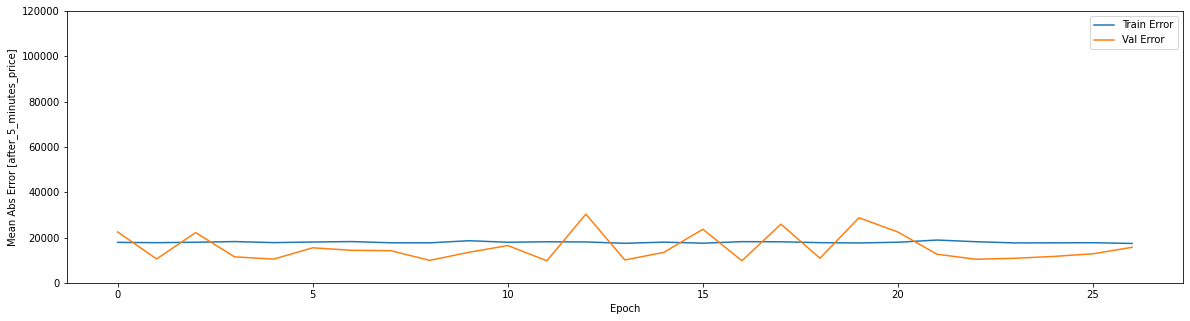

In [40]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(20,5))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [after_5_minutes_price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,120000])
  plt.legend()

  # plt.figure(figsize=(6,4))
  # plt.xlabel('Epoch')
  # plt.ylabel('Mean Square Error [$after_5_minutes_price^2$]')
  # plt.plot(hist['epoch'], hist['mse'],
  #          label='Train Error')
  # plt.plot(hist['epoch'], hist['val_mse'],
  #          label = 'Val Error')
  # plt.ylim([0,20])
  # plt.legend()
  plt.show()

plot_history(history)

In [41]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} after_5_minutes_price".format(mae))

79/79 - 0s - loss: 362943360.0000 - mae: 15616.7012 - mse: 362943360.0000
Testing set Mean Abs Error: 15616.70 after_5_minutes_price


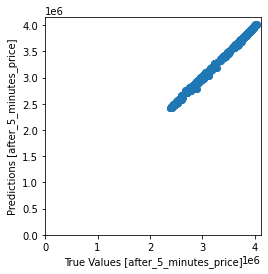

In [42]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [after_5_minutes_price]')
plt.ylabel('Predictions [after_5_minutes_price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

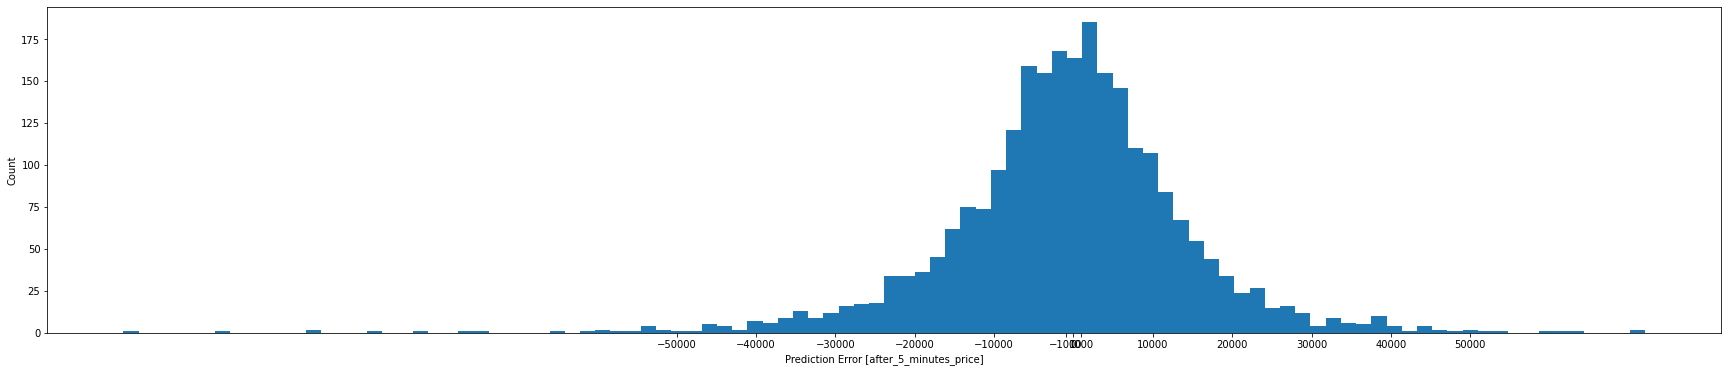

In [32]:
error = test_predictions - test_labels
plt.figure(figsize=(30,6))
plt.xticks([-50000, -40000, -30000, -20000, -10000, -1000, 0, 1000, 10000, 20000, 30000, 40000, 50000])
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error [after_5_minutes_price]")
_ = plt.ylabel("Count")